In [ ]:
#!pip install scikit-optimize
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn import preprocessing
from skopt import BayesSearchCV
from sklearn.metrics import roc_auc_score

## Carga de datos y visualización

In [ ]:
#cargamos los datos
path = 'https://raw.githubusercontent.com/Alberto0410/Clasificador-de-Musica/main/features_30_sec.csv?token=GHSAT0AAAAAAB4YX4RHZ5EVK47CMU5HZSVQY53YFOQ'
music = pd.read_csv(path)
music.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
#eliminamos la primer columna y vemos las features
music.drop('filename', axis = 1, inplace = True)
music.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [ ]:
#Vemos si hay NA's 
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

<ipython-input-77-4456a6ef0bdb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(var_df.corr(), dtype = np.bool))


Text(0.5, 1.0, 'Correlaciones entre las varaibles pt.1')

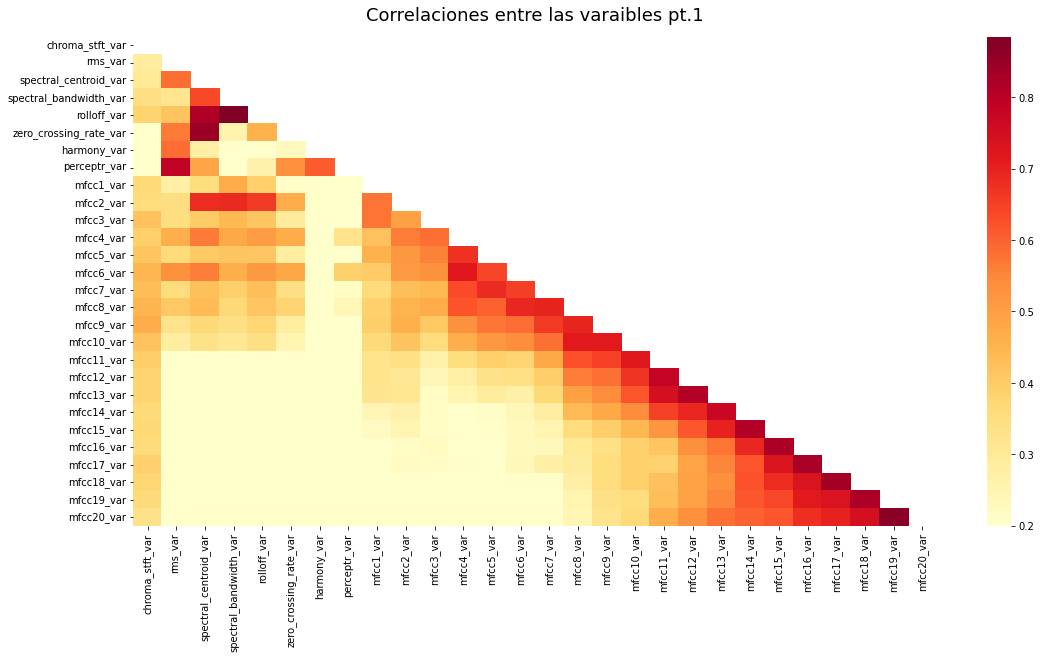

In [ ]:
#Vemos la correlacion entre las features varianza y promedio
var_df = music[[column for column in music.columns if 'var' in column]]
plt.figure(figsize = (18, 9))
mask = np.triu(np.ones_like(var_df.corr(), dtype = np.bool))
heatmap = sns.heatmap(var_df.corr(), mask = mask, vmin = 0.2, annot = False, cmap = 'YlOrRd')
heatmap.set_title('Correlaciones entre las varaibles pt.1', fontdict={'fontsize':18}, pad=16)

<ipython-input-78-60d93ba1a30f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(mean_df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlaciones entre las varaibles pt.2')

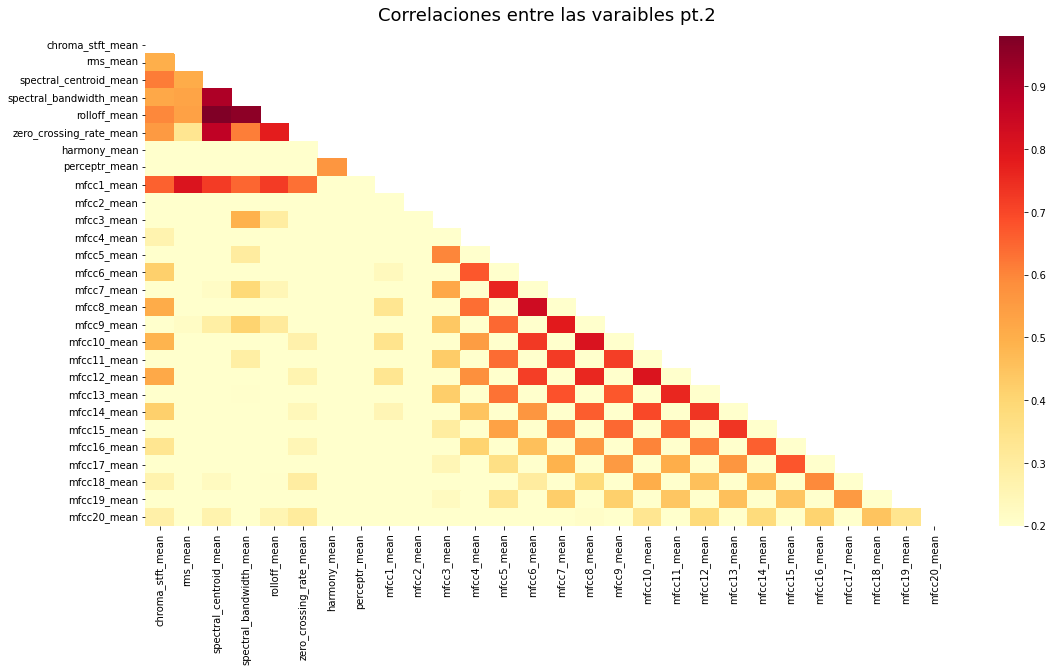

In [ ]:
mean_df = music[[column for column in music.columns if 'mean' in column]]
plt.figure(figsize = (18, 9))
mask = np.triu(np.ones_like(mean_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(mean_df.corr(), mask = mask, vmin = 0.2, annot = False, cmap = 'YlOrRd')
heatmap.set_title('Correlaciones entre las varaibles pt.2', fontdict={'fontsize':18}, pad = 16)

In [ ]:
#Vemos si hay un balanceo entre las categorias para ver si hacemos un remuestreo
music['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

## Tratamiento de los datos

In [ ]:
#Todo esta balanceado por lo que podemos proceder a dividir el dataser
X = music.copy().drop('label', axis = 1)
y = music['label']

#Normalizamos todo para que no haya problemas con los modelos
scaler = preprocessing.MinMaxScaler()
X_values = scaler.fit_transform(X)
X = pd.DataFrame(X_values, columns = music.columns[:-1])
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Grid Search

Para cada modelo procedemos a realizar un Grid Search para encontrar los mejores hiperparametros. Además, en cada Grid Search empleamos Cross Validation.

In [ ]:
def mod_fit(estimator, params, X_train, X_test, y_train, y_test, name):
  #Instanciamos el Grid Search
  gs_gbs = BayesSearchCV(estimator = estimator,
                         search_spaces = params,
                         cv = 4,
                         n_iter = 30,
                         random_state = 7,
                         n_jobs = -1,
                         refit = True
                         )
  
  #Ajustamos el modelo, predecimos y evaluamos
  gs_gbs.fit(X_train, y_train)
  y_pred = gs_gbs.predict(X_test)

  print(classification_report(y_test, y_pred))
  print('-'*30)
  print(f'Accuracy of {name}: {accuracy_score(y_test, y_pred)}')
  print(gs_gbs.best_params_)


In [ ]:
#Instanciamos todos los modelos que vamos a emplear
dtc = DecisionTreeClassifier(random_state = 7)
lr = LogisticRegression(random_state = 7, multi_class='multinomial')
knn = KNN()
rf = RandomForestClassifier(random_state = 7)
abc = AdaBoostClassifier(random_state = 7)
gbc = GradientBoostingClassifier(random_state = 7)
xgb_model = xgb.XGBClassifier(random_state = 7)


In [ ]:
params_dtc = {'max_depth' : (1, 8),
              'criterion' : ['gini', 'entropy']
              }

mod_fit(dtc, params_dtc, X_train, X_test, y_train, y_test, 'Decision Tree Classifier')

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packa

              precision    recall  f1-score   support

       blues       0.42      0.44      0.43        18
   classical       0.95      0.75      0.84        24
     country       0.36      0.53      0.43        17
       disco       0.68      0.46      0.55        28
      hiphop       0.40      0.86      0.55        14
        jazz       0.69      0.75      0.72        12
       metal       0.71      0.71      0.71        21
         pop       0.82      0.70      0.76        20
      reggae       0.73      0.70      0.71        23
        rock       0.53      0.35      0.42        23

    accuracy                           0.61       200
   macro avg       0.63      0.63      0.61       200
weighted avg       0.65      0.61      0.62       200

------------------------------
Accuracy of Decision Tree Classifier: 0.61
OrderedDict([('criterion', 'gini'), ('max_depth', 7)])


In [ ]:
params_lr = {'solver' : ['lbfgs', 'saga', 'newton-cg']}

mod_fit(lr, params_lr, X_train, X_test, y_train, y_test, 'Logistic Regression')

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packa

              precision    recall  f1-score   support

       blues       0.69      0.61      0.65        18
   classical       1.00      0.96      0.98        24
     country       0.55      0.71      0.62        17
       disco       0.69      0.39      0.50        28
      hiphop       0.50      0.64      0.56        14
        jazz       0.92      1.00      0.96        12
       metal       0.61      0.81      0.69        21
         pop       0.59      0.80      0.68        20
      reggae       0.75      0.78      0.77        23
        rock       0.62      0.35      0.44        23

    accuracy                           0.69       200
   macro avg       0.69      0.71      0.68       200
weighted avg       0.69      0.69      0.68       200

------------------------------
Accuracy of Logistic Regression: 0.685
OrderedDict([('solver', 'newton-cg')])


In [ ]:
params_knn = {'n_neighbors' : (5, 25)}

mod_fit(knn, params_knn, X_train, X_test, y_train, y_test, 'KNN')

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packa

              precision    recall  f1-score   support

       blues       0.80      0.67      0.73        18
   classical       0.85      0.96      0.90        24
     country       0.41      0.88      0.56        17
       disco       0.61      0.50      0.55        28
      hiphop       0.48      0.71      0.57        14
        jazz       1.00      0.58      0.74        12
       metal       0.84      0.76      0.80        21
         pop       0.89      0.80      0.84        20
      reggae       0.80      0.52      0.63        23
        rock       0.50      0.39      0.44        23

    accuracy                           0.67       200
   macro avg       0.72      0.68      0.68       200
weighted avg       0.71      0.67      0.67       200

------------------------------
Accuracy of KNN: 0.67
OrderedDict([('n_neighbors', 6)])


In [ ]:
params_rf = {'criterion' : ['gini', 'entropy'],
             'max_depth' : (1, 100),
             'n_estimators' : (10, 1200)
}

mod_fit(rf, params_rf, X_train, X_test, y_train, y_test, 'Random Forest')

              precision    recall  f1-score   support

       blues       0.93      0.78      0.85        18
   classical       0.96      0.96      0.96        24
     country       0.75      0.88      0.81        17
       disco       0.92      0.82      0.87        28
      hiphop       0.81      0.93      0.87        14
        jazz       0.92      0.92      0.92        12
       metal       0.83      0.95      0.89        21
         pop       0.77      0.85      0.81        20
      reggae       0.87      0.87      0.87        23
        rock       0.95      0.78      0.86        23

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200

------------------------------
Accuracy of Random Forest: 0.87
OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('n_estimators', 1200)])


In [ ]:
params_xgb = {'n_estimators' : (100, 1200),
              'max_depth': (1, 10)
}
mod_fit(xgb_model, params_xgb, X_train, X_test, y_train, y_test, 'Cross Gradient Booster')

              precision    recall  f1-score   support

       blues       0.87      0.72      0.79        18
   classical       0.96      0.92      0.94        24
     country       0.70      0.82      0.76        17
       disco       0.78      0.75      0.76        28
      hiphop       0.64      1.00      0.78        14
        jazz       0.75      0.75      0.75        12
       metal       0.94      0.81      0.87        21
         pop       0.94      0.75      0.83        20
      reggae       0.79      0.96      0.86        23
        rock       0.68      0.57      0.62        23

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

------------------------------
Accuracy of Cross Gradient Booster: 0.8
OrderedDict([('max_depth', 2), ('n_estimators', 721)])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb